# House Prediction in king country

In [1]:
import pandas as pd 
import matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\Shri\OneDrive\Desktop\New folder\Dataset\kc_house_data.csv', sep=',')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

In [6]:
data.shape

(21613, 21)

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)      # for converting scientific values into integer

In [11]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [14]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

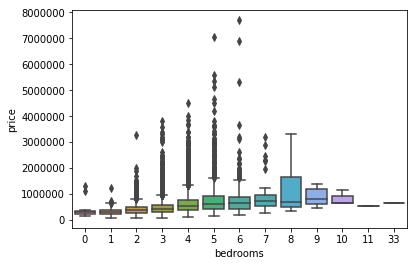

In [16]:
sns.boxplot(x='bedrooms',y='price',data=data) # we do not need to remove outliers they are valid

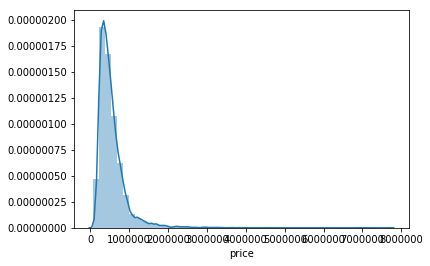

In [18]:
sns.distplot(data['price'])

# spliting the data into training and testing

In [21]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [143]:
X=data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15']]

In [144]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1340,5650
1,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1690,7639
2,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,2720,8062
3,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1360,5000
4,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1800,7503


In [145]:
Y=data['price']

In [146]:
Y.head()

0   221900.00000
1   538000.00000
2   180000.00000
3   604000.00000
4   510000.00000
Name: price, dtype: float64

In [149]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [153]:
X_train.head()            #75% data we are going to use for training

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
19642,4,2.50000,2070,4270,2.00000,0,0,3,8,2070,0,2070,4610
8626,3,2.25000,1400,6970,2.00000,0,0,3,8,1400,0,1800,8140
6954,5,3.00000,2190,4900,2.00000,0,0,5,7,1490,700,1370,4606
20242,4,2.50000,2547,4800,2.00000,0,0,3,9,2547,0,2598,4800
10376,5,3.50000,4060,8309,2.00000,0,0,3,9,2960,1100,1730,11711


In [154]:
Y_train

19642    493000.00000
8626     425000.00000
6954     588000.00000
20242    392440.00000
10376    630000.00000
10870    735000.00000
12464    502775.00000
1612     454000.00000
1616     349500.00000
12924    782000.00000
3263     691500.00000
19838    379900.00000
19602    669000.00000
2354     775000.00000
9544     175000.00000
17523    199500.00000
2147     353000.00000
15459    497950.00000
1582     420000.00000
4319     432500.00000
20748    395000.00000
11028    851000.00000
5754     720000.00000
1007     325000.00000
13833    515000.00000
12067   1195000.00000
20204    550000.00000
14909    380000.00000
18660    572000.00000
19917    825000.00000
             ...     
11721    255000.00000
8535     480000.00000
20191    675000.00000
15436    381500.00000
12170    219950.00000
5758     368250.00000
18707    340000.00000
17657    820000.00000
9772     315000.00000
18491    621000.00000
19315    539950.00000
1949     480000.00000
20851    447500.00000
12911    818000.00000
49      13

In [155]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00000,1050,6317,1.50000,0,0,4,7,1050,0,1600,9616
1348,4,2.25000,2040,9565,1.00000,0,0,3,8,1400,640,1890,8580
20366,4,2.50000,2500,4000,2.00000,0,0,3,8,2500,0,1480,4300
16617,5,2.00000,2360,19899,1.00000,0,0,4,7,2360,0,1860,19998
20925,3,3.00000,1670,4440,1.00000,0,0,3,7,1670,0,1670,4622
7891,5,2.75000,2400,15781,1.00000,0,0,4,7,1200,1200,2390,7500
939,3,2.25000,1580,47916,1.00000,0,0,3,7,1580,0,1980,75358
10502,3,2.00000,1560,7000,1.00000,0,0,4,7,1560,0,1560,7200
2948,3,1.00000,1400,9460,1.00000,0,0,3,7,1060,340,1570,7700
5079,2,2.50000,2270,1763,3.00000,0,0,3,7,1820,450,2180,1763


In [156]:
Y_test

3834     349950.00000
1348     450000.00000
20366    635000.00000
16617    355500.00000
20925    246950.00000
7891     406550.00000
939      350000.00000
10502    226500.00000
2948     265000.00000
5079     656000.00000
10124    580000.00000
5624     885000.00000
7567     270000.00000
19375    509000.00000
4681     650000.00000
8745     272000.00000
19682    720000.00000
19606    335000.00000
17375    492500.00000
6417     722500.00000
16730    209950.00000
20360    255000.00000
6735     647500.00000
19944    650000.00000
21187    308000.00000
1663     720500.00000
21225    635000.00000
20544    455000.00000
18222    529999.00000
8858     200000.00000
             ...     
8119     285000.00000
2481     236500.00000
19750    335000.00000
14392    270000.00000
17864    480000.00000
14872    475000.00000
1753     368000.00000
18628   1600000.00000
18453    170500.00000
958      345500.00000
3855     203000.00000
8914     290000.00000
10240    485000.00000
3836     300000.00000
13528   31

# Normalisation basically standardization

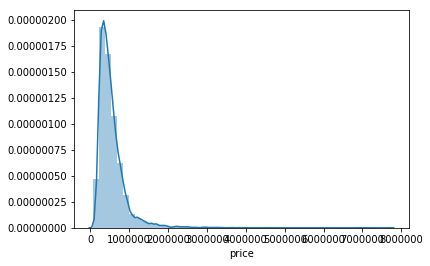

In [120]:
sns.distplot(data['price'])

In [157]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [158]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

C:\Users\Shri\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shri\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [160]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
19642,4,2.50000,2070,4270,2.00000,0,0,3,8,2070,0,2070,4610
8626,3,2.25000,1400,6970,2.00000,0,0,3,8,1400,0,1800,8140
6954,5,3.00000,2190,4900,2.00000,0,0,5,7,1490,700,1370,4606
20242,4,2.50000,2547,4800,2.00000,0,0,3,9,2547,0,2598,4800
10376,5,3.50000,4060,8309,2.00000,0,0,3,9,2960,1100,1730,11711
10870,3,2.50000,2390,9157,2.00000,0,0,3,9,2390,0,2360,8250
12464,3,1.75000,1700,9840,1.00000,0,0,4,8,1200,500,2040,14169
1612,3,2.50000,2530,43733,2.00000,0,0,3,8,1530,1000,1730,43548
1616,3,2.00000,1270,3600,1.00000,0,0,3,7,1270,0,1660,3600
12924,4,2.50000,3510,24604,2.00000,0,0,3,10,3510,0,3530,26673


In [161]:
X_train_std

array([[ 0.69608634,  0.49894508, -0.00810266, ..., -0.65896096,
         0.12372791, -0.29371924],
       [-0.40802008,  0.173745  , -0.74457445, ..., -0.65896096,
        -0.27289927, -0.16524962],
       [ 1.80019275,  1.14934525,  0.12380274, ...,  0.93301185,
        -0.90456477, -0.29386481],
       ...,
       [-0.40802008,  0.173745  , -0.32687403, ..., -0.65896096,
        -0.69890623, -0.18399236],
       [-1.51212649, -1.45225542, -1.01937736, ..., -0.43153627,
        -0.76794874, -0.3042734 ],
       [-0.40802008, -1.45225542, -0.68961387, ...,  0.0233131 ,
        -1.38933131, -0.17980708]])

In [162]:
X_test_std

array([[-1.51212649, -1.45225542, -1.12929852, ..., -0.65896096,
        -0.56669717, -0.11153258],
       [ 0.69608634,  0.173745  , -0.04107901, ...,  0.79655703,
        -0.14069021, -0.14923641],
       [ 0.69608634,  0.49894508,  0.46455834, ..., -0.65896096,
        -0.74297592, -0.30500127],
       ...,
       [-0.40802008,  0.49894508,  1.49781727, ..., -0.65896096,
         1.06388121,  3.64443868],
       [-0.40802008,  0.49894508, -0.55551005, ..., -0.65896096,
        -0.55494526, -0.27315682],
       [-0.40802008,  1.14934525,  0.92622723, ...,  2.47949972,
         0.41752581,  0.20014272]])

In [163]:
Y_train

19642    493000.00000
8626     425000.00000
6954     588000.00000
20242    392440.00000
10376    630000.00000
10870    735000.00000
12464    502775.00000
1612     454000.00000
1616     349500.00000
12924    782000.00000
3263     691500.00000
19838    379900.00000
19602    669000.00000
2354     775000.00000
9544     175000.00000
17523    199500.00000
2147     353000.00000
15459    497950.00000
1582     420000.00000
4319     432500.00000
20748    395000.00000
11028    851000.00000
5754     720000.00000
1007     325000.00000
13833    515000.00000
12067   1195000.00000
20204    550000.00000
14909    380000.00000
18660    572000.00000
19917    825000.00000
             ...     
11721    255000.00000
8535     480000.00000
20191    675000.00000
15436    381500.00000
12170    219950.00000
5758     368250.00000
18707    340000.00000
17657    820000.00000
9772     315000.00000
18491    621000.00000
19315    539950.00000
1949     480000.00000
20851    447500.00000
12911    818000.00000
49      13

In [164]:
Y_test

3834     349950.00000
1348     450000.00000
20366    635000.00000
16617    355500.00000
20925    246950.00000
7891     406550.00000
939      350000.00000
10502    226500.00000
2948     265000.00000
5079     656000.00000
10124    580000.00000
5624     885000.00000
7567     270000.00000
19375    509000.00000
4681     650000.00000
8745     272000.00000
19682    720000.00000
19606    335000.00000
17375    492500.00000
6417     722500.00000
16730    209950.00000
20360    255000.00000
6735     647500.00000
19944    650000.00000
21187    308000.00000
1663     720500.00000
21225    635000.00000
20544    455000.00000
18222    529999.00000
8858     200000.00000
             ...     
8119     285000.00000
2481     236500.00000
19750    335000.00000
14392    270000.00000
17864    480000.00000
14872    475000.00000
1753     368000.00000
18628   1600000.00000
18453    170500.00000
958      345500.00000
3855     203000.00000
8914     290000.00000
10240    485000.00000
3836     300000.00000
13528   31

# Model Training

In [165]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [169]:
lr.fit(X_train_std,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
Y_pred=lr.predict(X_test_std)

In [171]:
Y_pred

array([356776.02589274, 511927.33428643, 573736.52389151, ...,
       824101.44697874, 437013.51415353, 731915.82170728])

In [173]:
Y_test

3834     349950.00000
1348     450000.00000
20366    635000.00000
16617    355500.00000
20925    246950.00000
7891     406550.00000
939      350000.00000
10502    226500.00000
2948     265000.00000
5079     656000.00000
10124    580000.00000
5624     885000.00000
7567     270000.00000
19375    509000.00000
4681     650000.00000
8745     272000.00000
19682    720000.00000
19606    335000.00000
17375    492500.00000
6417     722500.00000
16730    209950.00000
20360    255000.00000
6735     647500.00000
19944    650000.00000
21187    308000.00000
1663     720500.00000
21225    635000.00000
20544    455000.00000
18222    529999.00000
8858     200000.00000
             ...     
8119     285000.00000
2481     236500.00000
19750    335000.00000
14392    270000.00000
17864    480000.00000
14872    475000.00000
1753     368000.00000
18628   1600000.00000
18453    170500.00000
958      345500.00000
3855     203000.00000
8914     290000.00000
10240    485000.00000
3836     300000.00000
13528   31

In [174]:
from sklearn.metrics import mean_absolute_error,r2_score

In [175]:
mean_absolute_error(Y_test,Y_pred)

151500.536010902

In [176]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
3834,2,1.00000,1050,6317,1.50000,0,0,4,7,1050,0,1600,9616
1348,4,2.25000,2040,9565,1.00000,0,0,3,8,1400,640,1890,8580
20366,4,2.50000,2500,4000,2.00000,0,0,3,8,2500,0,1480,4300
16617,5,2.00000,2360,19899,1.00000,0,0,4,7,2360,0,1860,19998
20925,3,3.00000,1670,4440,1.00000,0,0,3,7,1670,0,1670,4622
7891,5,2.75000,2400,15781,1.00000,0,0,4,7,1200,1200,2390,7500
939,3,2.25000,1580,47916,1.00000,0,0,3,7,1580,0,1980,75358
10502,3,2.00000,1560,7000,1.00000,0,0,4,7,1560,0,1560,7200
2948,3,1.00000,1400,9460,1.00000,0,0,3,7,1060,340,1570,7700
5079,2,2.50000,2270,1763,3.00000,0,0,3,7,1820,450,2180,1763


In [177]:
X_test.loc[7148]

bedrooms           3.00000
bathrooms          1.75000
sqft_living     1520.00000
sqft_lot        5500.00000
floors             1.50000
waterfront         0.00000
view               0.00000
condition          5.00000
grade              7.00000
sqft_above      1520.00000
sqft_basement      0.00000
sqft_living15   2310.00000
sqft_lot15      5500.00000
Name: 7148, dtype: float64

In [178]:
r2_score(Y_test,Y_pred)

0.6211653492243892

# Lets predict for Single House

In [179]:
new_house=[[3,1,1520,5000,1,0,0,3,8,1000,1,2000,5000]]

In [180]:
new_house_std=std.transform(new_house)

In [181]:
new_house_std

array([[-0.40802008, -1.45225542, -0.61266906, -0.23898601, -0.91886978,
        -0.08921717, -0.30859645, -0.62682707,  0.29479541, -0.95778828,
        -0.65668671,  0.02089864, -0.27952571]])

In [182]:
int(lr.predict(new_house_std))

415354